# HW4

Justin Hoang  
CSCI 4930

### Import Dataset
Import and read the dataset. Store in a dataframe.

In [165]:
import pandas as pd

In [166]:
df = pd.read_csv("spiral-dataset.csv", index_col=None, sep=r'\s', header=None)
df.columns = ['x', 'y', 'target']

df.head()

/var/folders/pt/_3pv06z57s3_j0w3tq9l60p80000gn/T/ipykernel_53361/2051164814.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("spiral-dataset.csv", index_col=None, sep=r'\s', header=None)


,x,y,target
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3


### Euclidean Distance Function
This function calculates the Euclidean distance between two points

In [167]:
import numpy as np

In [168]:
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1-p2) ** 2))

### Distance Matrix Function
This function creates a matrix of distances betwen points in the dataset.

In [169]:
def distance_matrix(data):
    n = len(data)
    dist_matrix = np.zeros((n, n))
    
    for i in range(n):
        for k in range(n):
            dist = euclidean_distance(data[i], data[k])
            dist_matrix[i][k] = dist
            dist_matrix[k][i] = dist
            
    return dist_matrix

## Linkage Function
This function will link clusters based on the link type.

In [170]:
def link(dataframe, linktype):
    dataset = dataframe[list(('x', 'y'))].to_numpy()
    
    n = len(dataset)
    clusters = [[pt] for pt in range(n)] # init clusters
    initial_dists = distance_matrix(dataset) # init initial distance matrix
    cutoff = 3 # cutoff for merging
    
    while len(clusters) > cutoff:
        min_dist = float('inf')
        min_i = -1
        min_k = -1
        
        for i in range(len(clusters)):
            for k in range(i+1, len(clusters)):
                # single linkage
                if linktype == 1:
                    cluster_dist = float('inf')
                    
                    for pt_i in clusters[i]:
                        for pt_k in clusters[k]:
                            if initial_dists[pt_i, pt_k] < cluster_dist:
                                cluster_dist = initial_dists[pt_i, pt_k]
                    
                    # new min value found            
                    if cluster_dist < min_dist:
                        min_dist = cluster_dist
                        min_i = i
                        min_k = k
                        
                # complete linkage
                if linktype == 2:
                    cluster_dist = float('-inf')
                    
                    for pt_i in clusters[i]:
                        for pt_k in clusters[k]:
                            if initial_dists[pt_i, pt_k] > cluster_dist:
                                cluster_dist = initial_dists[pt_i, pt_k]
                    
                    # new min value found            
                    if cluster_dist < min_dist:
                        min_dist = cluster_dist
                        min_i = i
                        min_k = k
                        
                # average linkage
                if linktype == 3:
                    total_dist = 0
                    num_pairs = 0
                    
                    for pt_i in clusters[i]:
                        for pt_k in clusters[k]:
                            total_dist += initial_dists[pt_i, pt_k]
                            num_pairs += 1
                            
                    # average distance
                    avg_dist = total_dist / num_pairs if num_pairs > 0 else float('-inf')
                    
                    # new min value found
                    if avg_dist < min_dist:
                        min_dist = avg_dist
                        min_i = i
                        min_k = k
                        
                # centroid linkage
                if linktype == 4:
                    # calculate centroids for i and k
                    centroid_i, centroid_k = np.zeros(dataset.shape[1]), np.zeros(dataset.shape[1])
                    for pt_i in clusters[i]:
                        centroid_i += dataset[pt_i]
                    centroid_i /= len(clusters[i])
                    
                    for pt_k in clusters[k]:
                        centroid_k += dataset[pt_k]
                    centroid_k /= len(clusters[k])
                    
                    centroid_dist = euclidean_distance(centroid_i, centroid_k)
                    
                    weighted_dist = centroid_dist + (1e-8 *i *k)
                    # new min value found
                    if weighted_dist < min_dist:
                        min_dist = weighted_dist
                        min_i = i
                        min_k = k
                        
        new_cluster = clusters[min_i] + clusters[min_k]
    
        clusters.pop(max(min_i, min_k))
        clusters.pop(min(min_i, min_k))
        clusters.append(new_cluster)
    
    print("Linktype: ", linktype)
    return clusters, dataset
                    

#### Single Linkage (1)

In [171]:
single_link, dataset = link(df, 1)

Linktype:  1


#### Complete Linkage (2)

In [172]:
complete_link, dataset = link(df, 2)

Linktype:  2


#### Average Linkage (3)

In [173]:
avg_link, dataset = link(df, 3)

Linktype:  3


#### Centroid Linkage (4)

In [174]:
centroid_link, dataset = link(df, 4)

Linktype:  4


## Plotting the Data

In [175]:
import matplotlib.pyplot as plt

#### Plot Data Function
Function plots data points for clusters

In [176]:
def plot_data(clusters):
    cluster_data_x, cluster_data_y = [[], [], []], [[], [], []]
    
    # get data points
    for i in clusters[0]:
        data = dataset[i]
        cluster_data_x[0].append(data[0])
        cluster_data_y[0].append(data[1])
        
    for i in clusters[1]:
        data = dataset[i]
        cluster_data_x[1].append(data[0])
        cluster_data_y[1].append(data[1])
        
    for i in clusters[2]:
        data = dataset[i]
        cluster_data_x[2].append(data[0])
        cluster_data_y[2].append(data[1])
        
    return cluster_data_x, cluster_data_y

#### Plot Data from Linkage Clusters

In [177]:
single_x, single_y = plot_data(single_link)
complete_x, complete_y = plot_data(complete_link)
avg_x, avg_y = plot_data(avg_link)
centroid_x, centroid_y = plot_data(centroid_link)

#### Draw the Plots

Text(0.5, 1.0, 'Centroid Linkage')

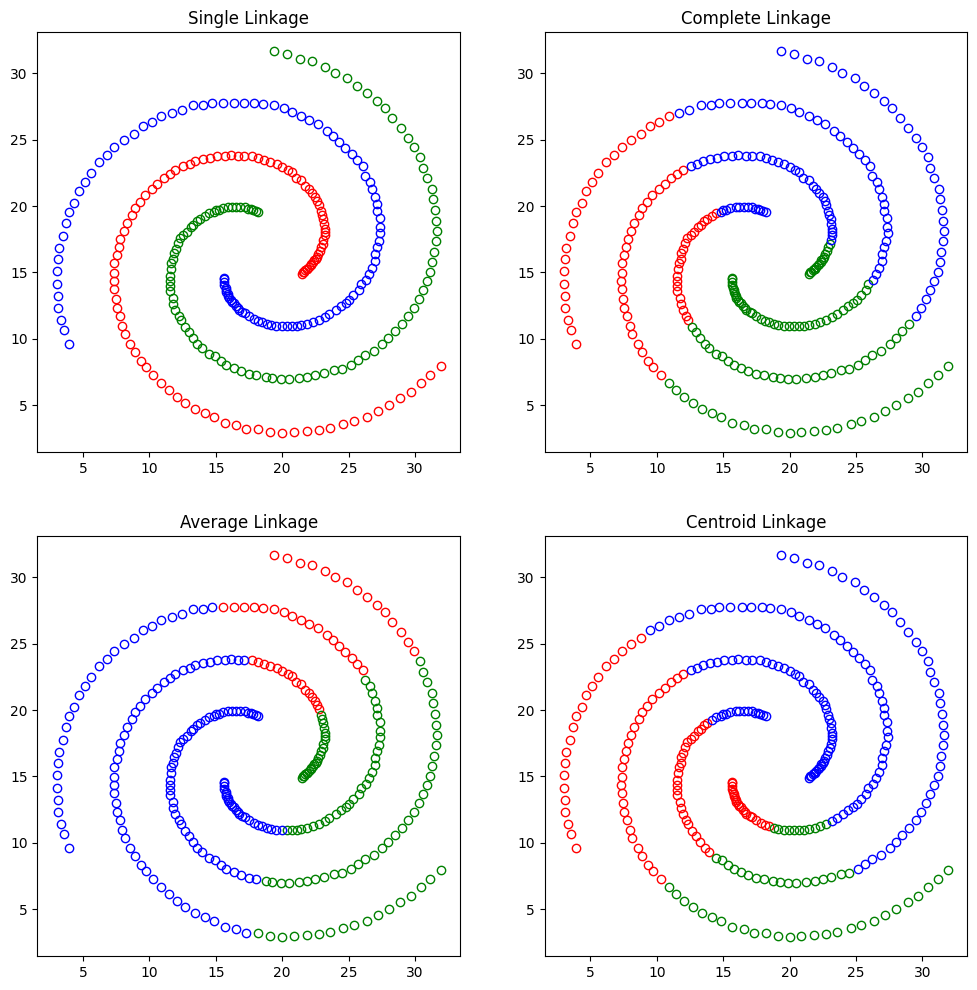

In [178]:
fig, axs = plt.subplots(2,2, figsize=(12,12))

# single linkage
axs[0,0].plot(single_x[0], single_y[0], 'o', markerfacecolor='none', markeredgecolor='red')
axs[0,0].plot(single_x[1], single_y[1], 'o', markerfacecolor='none', markeredgecolor='green')
axs[0,0].plot(single_x[2], single_y[2], 'o', markerfacecolor='none', markeredgecolor='blue')
axs[0,0].set_title("Single Linkage")

# complete linkage
axs[0,1].plot(complete_x[0], complete_y[0], 'o', markerfacecolor='none', markeredgecolor='red')
axs[0,1].plot(complete_x[1], complete_y[1], 'o', markerfacecolor='none', markeredgecolor='green')
axs[0,1].plot(complete_x[2], complete_y[2], 'o', markerfacecolor='none', markeredgecolor='blue')
axs[0,1].set_title("Complete Linkage")

# average linkage
axs[1,0].plot(avg_x[0], avg_y[0], 'o', markerfacecolor='none', markeredgecolor='red')
axs[1,0].plot(avg_x[1], avg_y[1], 'o', markerfacecolor='none', markeredgecolor='green')
axs[1,0].plot(avg_x[2], avg_y[2], 'o', markerfacecolor='none', markeredgecolor='blue')
axs[1,0].set_title("Average Linkage")

# centroid linkage
axs[1,1].plot(centroid_x[0], centroid_y[0], 'o', markerfacecolor='none', markeredgecolor='red')
axs[1,1].plot(centroid_x[1], centroid_y[1], 'o', markerfacecolor='none', markeredgecolor='green')
axs[1,1].plot(centroid_x[2], centroid_y[2], 'o', markerfacecolor='none', markeredgecolor='blue')
axs[1,1].set_title("Centroid Linkage")